In [1]:
from sklearn.datasets import fetch_mldata
from q1 import HopfieldNetwork
import numpy as np
import random
import matplotlib.pyplot as plt

mnist = fetch_mldata('MNIST original', data_home='.cache')
targets = mnist.target.tolist()

start, end = targets.index(1), targets.index(6)

dataset = [[1 if pixel > 0 else -1 for pixel in vector] for vector in mnist.data[start:end]]
random.shuffle(dataset)
trainset = dataset[:2000]
testset = dataset[2000:2020]

In [2]:
hf = HopfieldNetwork(
    train_dataset=trainset,
    mode='storkey'
)

In [3]:
def add_noise(vector, ratio=0.2):
    indices = range(len(vector))
    num = ratio * len(indices)
    for i in range(int(num)):
        c = random.choice(indices)
        vector[c] = 1 if vector[c] == -1 else -1
        
def show(vector, title='', suptitle=''):
    plt.imshow(np.array(vector).reshape(28, 28))
    plt.title(title)
    plt.suptitle(suptitle)
    plt.show()


def test(network, index, image):
    print 'Example %s' % index
    v = network.activate(image)
    show(image, "Input - Example %s" % index)
    show(v, "Output - Example %s" % index)


Example 0


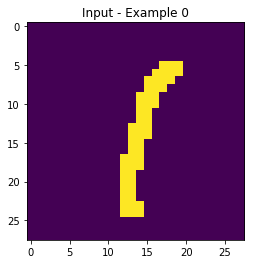

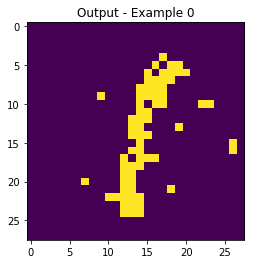

Example 1


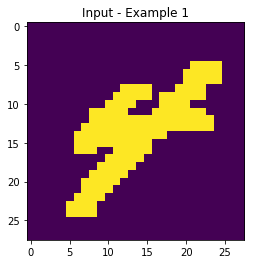

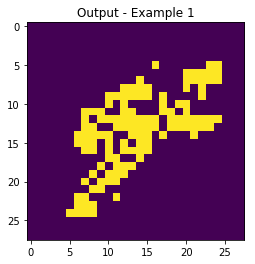

Example 2


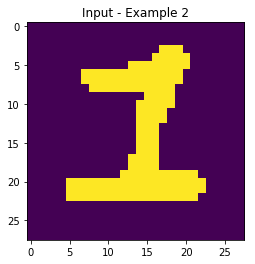

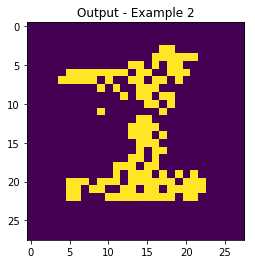

Example 3


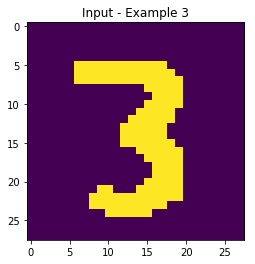

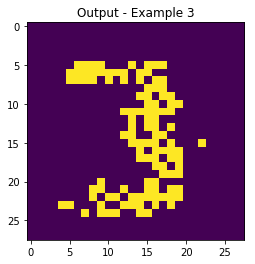

Example 4


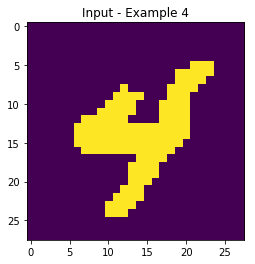

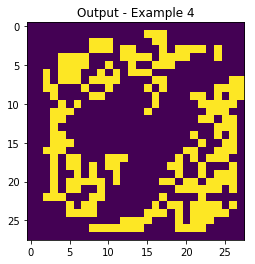

Example 5


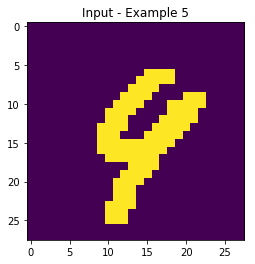

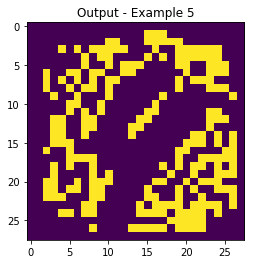

Example 6


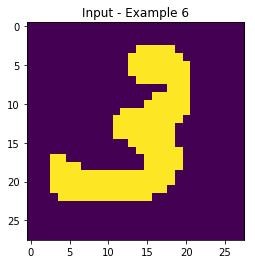

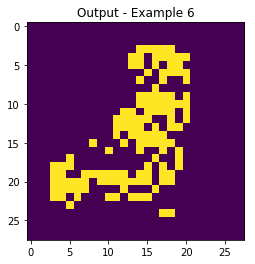

Example 7


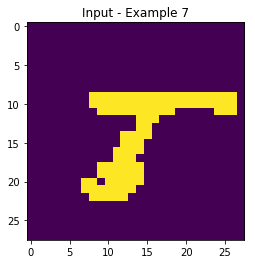

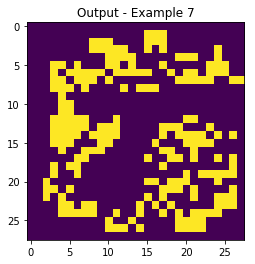

Example 8


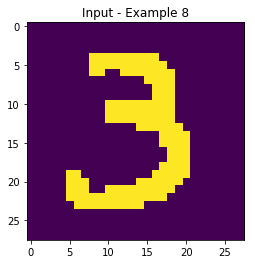

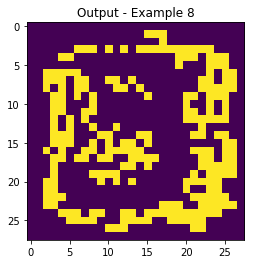

Example 9


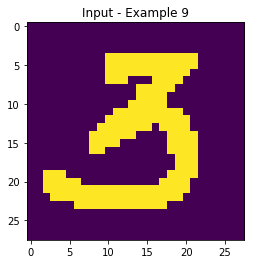

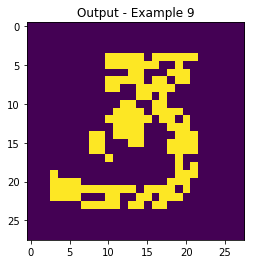

Example 10


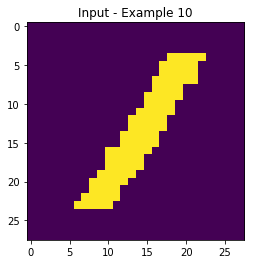

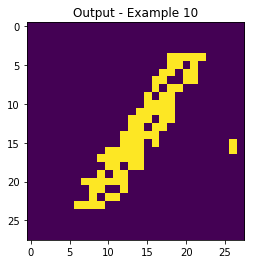

Example 11


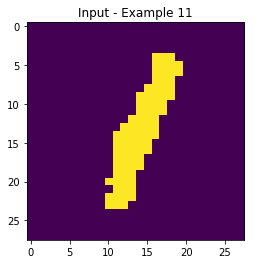

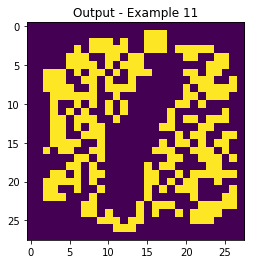

Example 12


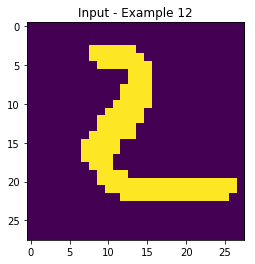

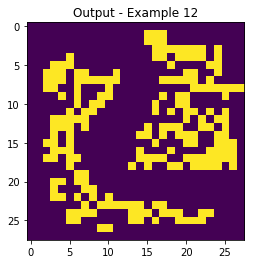

Example 13


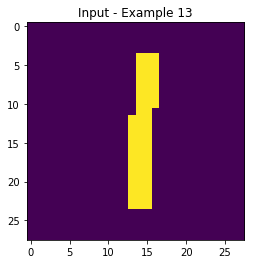

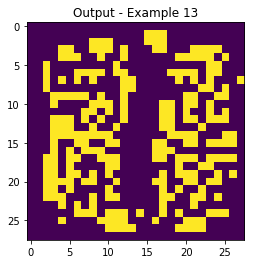

Example 14


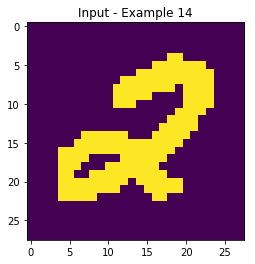

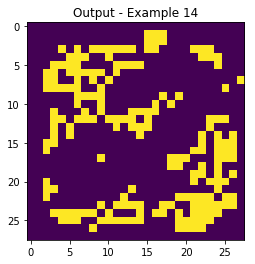

Example 15


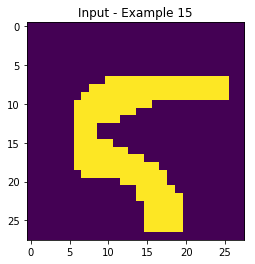

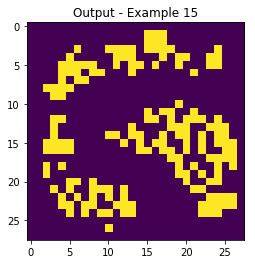

Example 16


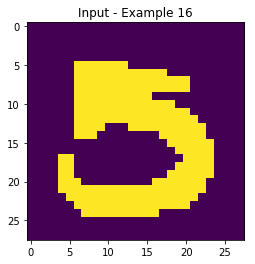

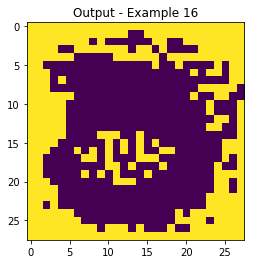

Example 17


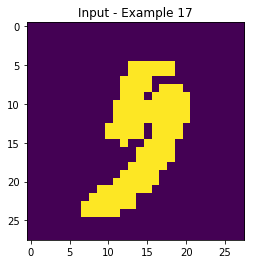

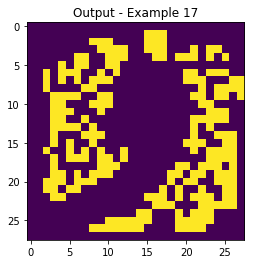

Example 18


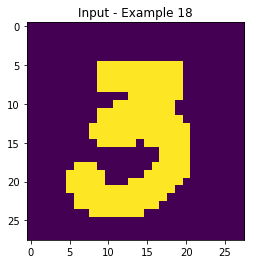

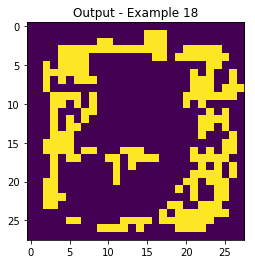

Example 19


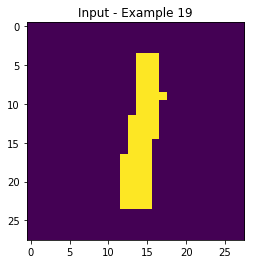

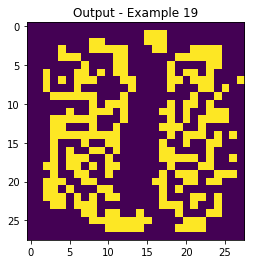

In [4]:
# test(10, dataset, hf, 'Without noise')
# add_noise(dataset[10], ratio=0.12)
# test(10, dataset, hf, 'With noise')
# test(400, dataset, hf)
# test(800, dataset, hf)
# add_noise(dataset[30000], ratio=1)
for index, image in enumerate(testset[0:50]):
    test(hf, index, image)